**Simple Linear Regression** is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.

#### Implementation of Simple Linear Regression
**Problem Statement**-
We are taking a dataset that has two variables: Salary (dependent variable) and Experience (Independent variable).

The goals of this problem is:

* We want to find out if there is any correlation between these two variables
* We will find the best fit line for the dataset.
* How the dependent variable is changing by changing the independent variable.

In [7]:
#Importing Basics libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Data Loading:
A sample data has been gathered which contains Experience as an independent feature & Salaries based on the experience as a dependent feature.

In [8]:
data = pd.read_excel(r'C:\Users\Admin\Downloads\Salary.xlsx')
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Downloads\\Salary.xlsx'

In [ ]:
data.shape

### Data Cleaning :
Removal of missing or irrelevant data points if any. Also ensuring both columns are numeric in nature as the Experience & Salary both features are numerical observations.

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

As per the above observations we can see that both the variables are numeric in nature which means the data is in proper format. We can also observe that the columns/features do not have any missing values.

In [ ]:
#Assumption 1: There should be no outliers in the data.
#Check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [ ]:
#Assumption 2:Assumption of Linearity:Every ind var should have a
#linear relationship with the dep var.

sns.lmplot(data=data,x='Experience',y='Salary')
plt.show();

### Step 4: Data Splitting

In [ ]:
x= data.iloc[:, :-1].values
y= data.iloc[:, -1].values

In [ ]:
y

In [ ]:
#Assumption of Normality: The dependent variable should follow an
#approximate normal distribution
sns.distplot(y)
plt.show()

In [ ]:
"""
# Log transformation
import numpy as np
y_log  = np.log(y)
"""

In [ ]:
#sns.distplot(y_log)
#plt.show()

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3 , random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train,y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

In [ ]:
#Prediction of Test and Training set result
y_pred= lm.predict(x_test)
y_predtrain= lm.predict(x_train)

In [9]:
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, y_predtrain, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

NameError: name 'x_train' is not defined

In [5]:
#visualizing the Test set results
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train, y_predtrain, color="red")
plt.title("Salary vs Experience (Test Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

NameError: name 'x_test' is not defined

In [ ]:
import pandas as pd

# Creating a DataFrame with x_test, y_test, and y_pred
results_df = pd.DataFrame({'Experience': x_test.squeeze(), 'Actual Salary': y_test, 'Predicted Salary': y_pred})
results_df

,Experience,Actual Salary,Predicted Salary
0,3.6,47900,50372.211512
1,1.8,34900,37632.124077
2,3.0,49000,46125.515701
3,1.8,34000,37632.124077
4,1.5,35900,35508.776172
5,4.9,60000,59573.385771
6,1.6,32000,36216.558807
7,3.5,45000,49664.428877


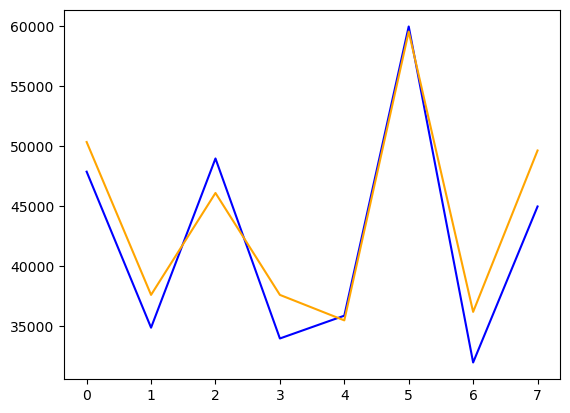

In [ ]:
results_df["Actual Salary"].plot(color="blue")
results_df["Predicted Salary"].plot(color="orange")
plt.show()

In [ ]:
results_df["Residual"]=results_df["Actual Salary"]-results_df["Predicted Salary"]
results_df

,Experience,Actual Salary,Predicted Salary,Residual
0,3.6,47900,50372.211512,-2472.211512
1,1.8,34900,37632.124077,-2732.124077
2,3.0,49000,46125.515701,2874.484299
3,1.8,34000,37632.124077,-3632.124077
4,1.5,35900,35508.776172,391.223828
5,4.9,60000,59573.385771,426.614229
6,1.6,32000,36216.558807,-4216.558807
7,3.5,45000,49664.428877,-4664.428877


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.8877894624797882
